# The `simple_disk` Class

This Notebook will work through the functions available with the `simple_disk` class.

In [1]:
# Prep the Notebook
import numpy as np
import matplotlib.pyplot as plt

## Instantiation

To start a model, we need to specify a few things. Firstly, we need to define the geometrical properties of the disk, such as the inclination, `inc`, and position angle, `PA`, both in degrees. The position angle is measured as the angle between the red-shifted major axis and North. We also need to tell it the field of view of the image with `FOV` and the number of pixels on each side of the image with `Npix`.

In [2]:
from simple_disk import simple_disk
disk = simple_disk(inc=40.0, PA=30.0, mstar=2.0, FOV=5.0, Npix=128)

## Coordinate Systems

We have two coordinate systems, the sky-frame and disk-frame. The sky-frame coordinates will always be in arcseconds while the disk-frame coordaintes will be in au. The number of pixels you have along each dimension is given by the `Npix` argument when intitialising `simple_disk`, while the field of view, `FOV`, and source distance, `dist`, parameters will dictate the size of the image.

You can always change the number of pixels or field of view with,

```python
# change field of view
disk.set_FOV(FOV=1.0, Npix=128)
```

which will recalculate all the deprojected pixel values.

### Disk-Plane Coordinates

The disk-frame coordaintes are accessed by,

```python
x = disk.x_disk
y = disk.y_disk
```

with associated axes,

```python
xaxis = disk.xaxis_disk
yaxis = disk.yaxis_disk
```

If you're using `imshow`, you can also access the extent through


```python
extent = disk.extent_disk
```

although a helper function,

```python
disk.format_disk_plot(ax=ax)
```

will apply the appropriate axis limits to `ax` for a disk-frame projection.

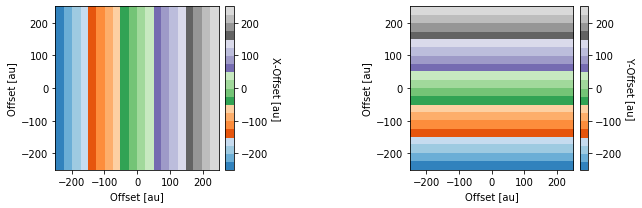

In [3]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 3))
 
ax = axs[0]  # Plot the x-axis offset.
im = ax.imshow(disk.x_disk, origin='lower', extent=disk.extent_disk, cmap='tab20c')
disk.format_disk_plot(ax)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('X-Offset [au]', rotation=270, labelpad=13)

ax = axs[1]  # Plot the y-axis offset.
im = ax.imshow(disk.y_disk, origin='lower', extent=disk.extent_disk, cmap='tab20c')
disk.format_disk_plot(ax)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('Y-Offset [au]', rotation=270, labelpad=13)

plt.tight_layout()

### Sky-Plane Coordinates

The on-sky pixel coordinates are accessed in a similar manner by:

```python
x = disk.x_sky
y = disk.y_sky
```

Both of these are two-dimensional arrays with the pixel values. If you need the axes for plotting then you can use:

```python
xaxis = disk.xaxis_sky
yaxis = disk.yaxis_sky
```

and for `imshow` plotting,

```python
extent = disk.extent_sky
```

**Note:** When plotting, you'll need to flip the x-axis to account for the on-sky projection.

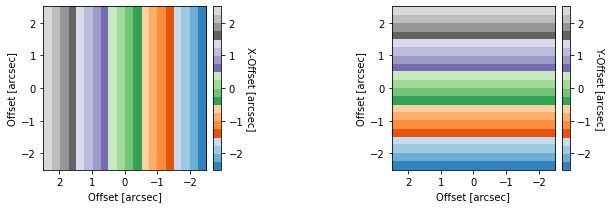

In [4]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 3))
 
ax = axs[0]  # Plot the x-axis offset.
im = ax.imshow(disk.x_sky, origin='lower', extent=disk.extent_sky, cmap='tab20c')
disk.format_sky_plot(ax)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('X-Offset [arcsec]', rotation=270, labelpad=13)

ax = axs[1]  # Plot the y-axis offset.
im = ax.imshow(disk.y_sky, origin='lower', extent=disk.extent_sky, cmap='tab20c')
disk.format_sky_plot(ax)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('Y-Offset [arcsec]', rotation=270, labelpad=13)

plt.tight_layout()

### Polar Coordinates

Both sky- and disk-frame coordinates have associated polar coordiantes, `disk.r_*` and `disk.t_*`, where the polar angles are in radians, and the radial coordiantes are in arcseconds for sky-frame and au for disk frame.

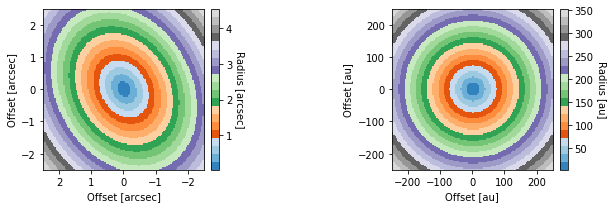

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 3))
 
ax = axs[0]  # Plot the x-axis offset.
im = ax.imshow(disk.r_sky, origin='lower', extent=disk.extent_sky, cmap='tab20c')
disk.format_sky_plot(ax)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('Radius [arcsec]', rotation=270, labelpad=13)

ax = axs[1]  # Plot the y-axis offset.
im = ax.imshow(disk.r_disk, origin='lower', extent=disk.extent_disk, cmap='tab20c')
disk.format_disk_plot(ax)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('Radius [au]', rotation=270, labelpad=13)

plt.tight_layout()

**Note:** The disk polar angles are not the same as the position angle.

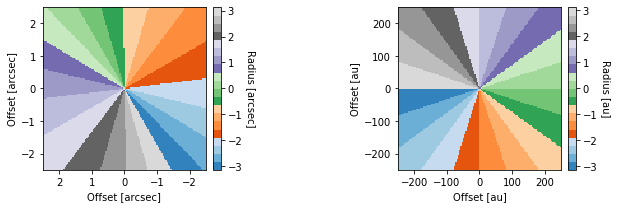

In [6]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 3))
 
ax = axs[0]  # Plot the x-axis offset.
im = ax.imshow(disk.t_sky, origin='lower', extent=disk.extent_sky, cmap='tab20c')
disk.format_sky_plot(ax)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('Radius [arcsec]', rotation=270, labelpad=13)

ax = axs[1]  # Plot the y-axis offset.
im = ax.imshow(disk.t_disk, origin='lower', extent=disk.extent_disk, cmap='tab20c')
disk.format_disk_plot(ax)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('Radius [au]', rotation=270, labelpad=13)

plt.tight_layout()

## Keplerian Rotation

Given the deprojected coordinates, it is simple to calculate the background keplerian rotation,

$$v_{\phi}(r) = \sqrt{\frac{GM_{\rm star}}{r}}$$

which is projected onto the sky via,

$$v_{\phi,\, {\rm proj}}(r,\, \phi) = \sqrt{\frac{GM_{\rm star}}{r}} \times \sin(i) \times \cos (\phi)$$

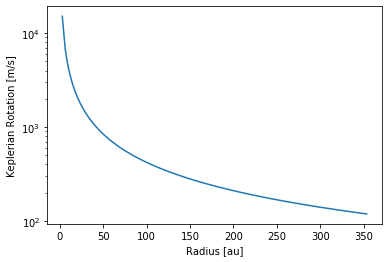

In [7]:
disk.plot_keplerian(logy=True)  # plot the Keplerian rotation profile

The stellar mass can be changed at any time through the `mstar` attribute,

```python
disk.mstar = 1.0. # stellar mass in Msun
```

The projected rotation can be easily accessed by the `disk.vkep_sky` property, with an equivalent array for the disk-centric coordinates, `disk.vkep_disk`.

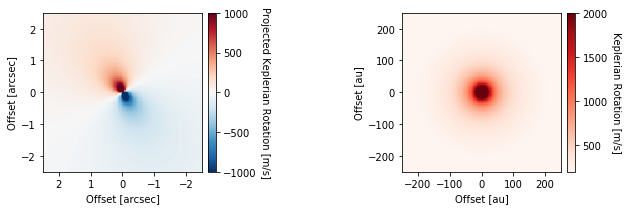

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 3))
 
ax = axs[0]  # Plot the x-axis offset.
im = ax.imshow(disk.vkep_sky, origin='lower', extent=disk.extent_sky,
              cmap='RdBu_r', vmin=-1e3, vmax=1e3)
disk.format_sky_plot(ax)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('Projected Keplerian Rotation [m/s]', rotation=270, labelpad=13)

ax = axs[1]  # Plot the y-axis offset.
im = ax.imshow(disk.vkep_disk, origin='lower', extent=disk.extent_disk,
               cmap='Reds', vmin=2e2, vmax=2e3)
disk.format_disk_plot(ax)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('Keplerian Rotation [m/s]', rotation=270, labelpad=13)

plt.tight_layout()

## Making Pseudo-Images

In this section we describe how to made pseudo images, both as channel maps or cubes.

### Line Profiles

For simplicity we assume that the emission distribution which is made up of Gaussian profiles,

$$
I_{\nu} = T_{\rm B} \times \exp \left[ -\left( \frac{v - v_0}{\Delta v} \right)^2 \right] 
$$


The line center, `v0`, is govenered by the projected velocity field and the line peak and width are described by simple radial power laws of the form,

$$
T_{\rm B} = T_{{\rm B},\,0} \times \left( \frac{r}{100~{\rm au}} \right)^{q_{T_{\rm B}}}
\quad \text{and} \quad
\Delta v(r) = \Delta v_0 \times \left( \frac{r}{100~{\rm au}} \right)^{q_{\Delta v}}
$$

where the appropriate parameters are `dV0`, `dVq`, `Tb0` and `Tbq`.

**Note:** For the linewidth we use the Doppler width, not the FWHM or standard deviation of the Gaussian.

These can be specified when you instantiate the `simple_disk` class, or at any later point. Both these functions have the option to provide a maximum value which can be useful when using power laws which can lead to extremely large values at small $r$ values.

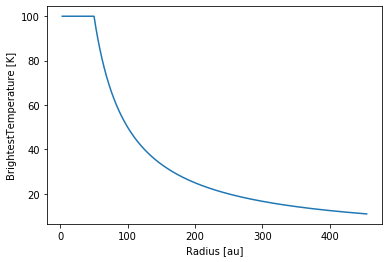

In [9]:
# set the brightness temperature profile and plot
disk.set_brightness(Tb0=50.0, Tbq=-1.0, Tbmax=100)
disk.plot_brightness()

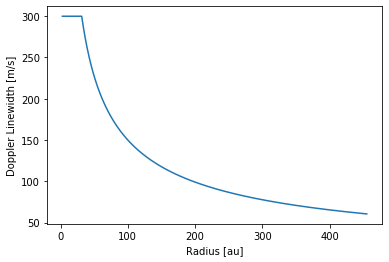

In [10]:
# set the Doppler width profile and plot
disk.set_linewidth(dV0=150.0, dVq=-0.6, dVmax=300.0)
disk.plot_linewidth()

### Making a Channel Map

Generating a channel map is done through the `disk.get_channel()` function. By default this requires the minimum and maximum velocity of the channel, `vmin` and `vmax`in m/s. The velocity field is assumed to be Keplerian, `disk.vkep`, unless any perturbations are included using the `dv0` argument.

As we have assumed a Gaussian line, integration over the profile is a simple analytical process,

$$
I_{\nu,\, {\rm chan}} = \frac{\sqrt{\pi} \, T_{\rm B}\, \Delta V}{2 (v_{\rm max} - v_{\rm min})} \left[ {\rm erf}\left( \frac{v_{\rm max} - v_0}{\Delta V} \right) - {\rm erf}\left( \frac{v_{\rm min} - v_0}{\Delta V} \right) \right]
$$

where $T_{\rm B}$ and $\Delta V$ are evaluated at the deprojected disk-frame coordinate.

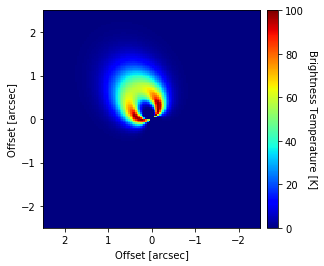

In [11]:
fig, ax = plt.subplots()
im = ax.imshow(disk.get_channel(v_min=250., v_max=350.),
               origin='lower', extent=disk.extent_sky,
               vmin=0, vmax=100, cmap='jet')
disk.format_sky_plot(ax)

cb = plt.colorbar(im, pad=0.02)
cb.set_label('Brightness Temperature [K]', rotation=270, labelpad=13)

Note that by changing the width of the channel you can get radically different emission.

### Pseudo-Observations

We can also make pseudo-observations by including a convolution with a Gaussian kernel and the inclusion of correlated noise.

The beam is specified by the FWHM of the major and minor axes in arcseconds through `bmaj` and `bmin`, respectively. If only the `bmaj` is provided, we assume a circular beam. A beam position angle can also be included with `bpa` which is measured in degrees. The noise is specified by the RMS in the Kelvin.

**Note:** None of these effects will account for the spatial filtering which happens when using an interferometer.

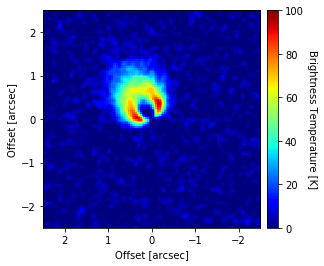

In [12]:
fig, ax = plt.subplots()
im = ax.imshow(disk.get_channel(v_min=250., v_max=350., bmaj=0.1, rms=3.0),
               origin='lower', extent=disk.extent_sky,
               vmin=0, vmax=100, cmap='jet')
disk.format_sky_plot(ax)

cb = plt.colorbar(im, pad=0.02)
cb.set_label('Brightness Temperature [K]', rotation=270, labelpad=13)

### Making a Data Cube

If you want instead to make an entire cube, you can use the `disk.get_cube()` function. Rather than requiring the `vmin` and `vmax` values, we require an array of channel centers, `velax`, in m/s. It is assumed that all channel are equally spaced in velocity.

This can also include a `spectral_response` kernel to simulate the spectral response of the correlator.

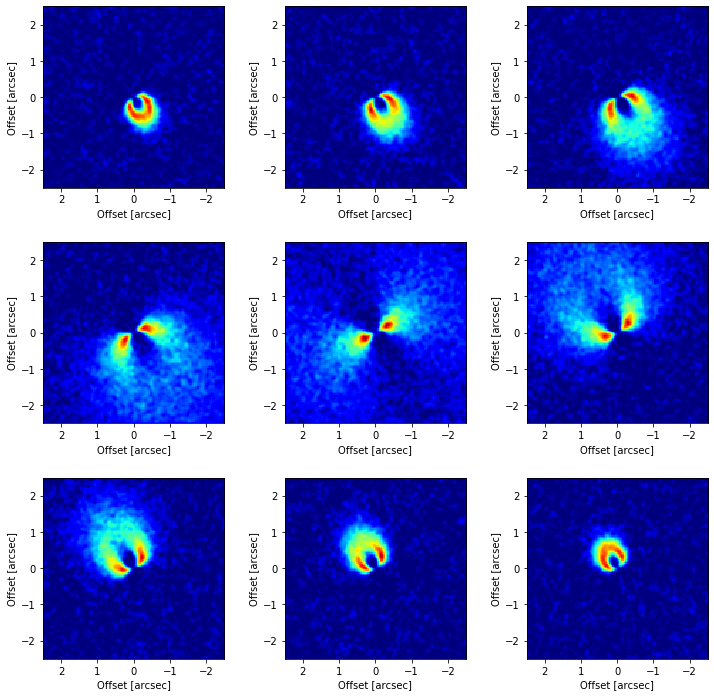

In [13]:
velax = np.arange(-400, 500, 100)  # velocity axis in [m/s]
cube = disk.get_cube(velax, bmaj=0.1, rms=3.0)  # make the imagecube

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(12, 12), gridspec_kw=dict(wspace=0.3, hspace=0.3))
for a, ax in enumerate(axs.flatten()):
    ax.imshow(cube[a], origin='lower', extent=disk.extent_sky,
              vmin=0.0, vmax=100.0, cmap='jet')
    disk.format_sky_plot(ax)